# Your smartphone knows your current activity using sensors data
    *In this example with this real world mobile sensors datasets we'll compare some machine learning algorithms to get to  know that which one could perform better

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Import Data

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
# Know your data
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
print(train_data.shape)

(7352, 563)


# Visualize your data (first 10 features representation)

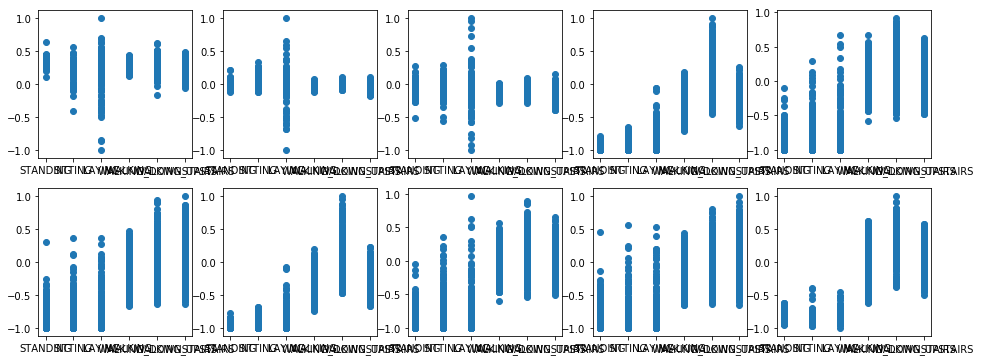

In [19]:
fig,axes=plt.subplots(2,5,figsize=(16,6))
count=0 #count as iterator
for ax in axes:
    for a in ax:
        a.scatter(train_data[train_data.columns[-1]],train_data[train_data.columns[count]])
        count+=1

# Prepare data for training and testing

In [124]:
# Remove labels from training dataset feature
X_train=train_data.drop(columns=train_data.columns[-1])
y_train=train_data[train_data.columns[-1]]

# Do the same with test data
X_test=test_data.drop(columns=train_data.columns[-1])
y_test=test_data[test_data.columns[-1]]

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
enc=LabelEncoder().fit(y_train)
y_train=enc.fit_transform(y_train)
y_test=enc.fit_transform(y_test)

# Now the dataset is ready to fit into a model. Let's start with KNearestNeighbors

In [91]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)

train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Training accuracy: {:.2f}".format(train_score))
print("Testing accuracy: {:.2f}".format(test_score))

Training accuracy: 0.98
Testing accuracy: 0.82


# 2. Linear Regression

In [49]:
model=LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)

train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Training accuracy: {:.2f}".format(train_score))
print("Testing accuracy: {:.2f}".format(test_score))

Training accuracy: 0.97
Testing accuracy: 0.95


# 3 Logistic Regression

In [64]:
model=LogisticRegression()
model.fit(X_train,y_train)

train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Training accuracy: {:.2f}".format(train_score))
print("Testing accuracy: {:.2f}".format(test_score))

Training accuracy: 0.99
Testing accuracy: 0.96


# 4. Decision Tree Classifier

In [65]:
model=DecisionTreeClassifier().fit(X_train,y_train)

train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Training accuracy: {:.2f}".format(train_score))
print("Testing accuracy: {:.2f}".format(test_score))

Training accuracy: 1.00
Testing accuracy: 0.86


# 5. Random Forest Classifier

In [78]:
model=RandomForestClassifier(n_estimators=10,verbose=1)
model.fit(X_train,y_train)

train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Training accuracy: {:.2f}".format(train_score))
print("Testing accuracy: {:.2f}".format(test_score))

Training accuracy: 1.00
Testing accuracy: 0.90


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


# 6. Naive Bayes Classifier

In [84]:
model=BernoulliNB(alpha=0.5).fit(X_train,y_train)

train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Training accuracy: {:.2f}".format(train_score))
print("Testing accuracy: {:.2f}".format(test_score))

Training accuracy: 0.86
Testing accuracy: 0.85


# 7. Support Vector Machine

In [86]:
model=SVC(C=10,verbose=True)
model.fit(X_train,y_train)

train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Training accuracy: {:.2f}".format(train_score))
print("Testing accuracy: {:.2f}".format(test_score))

[LibSVM]Training accuracy: 0.99
Testing accuracy: 0.95


# 8. Shallow Neural Network

In [93]:
model=MLPClassifier(activation='relu',hidden_layer_sizes=(30),solver='adam',verbose=True)
model.fit(X_train,y_train)

train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Training accuracy: {:.2f}".format(train_score))
print("Testing accuracy: {:.2f}".format(test_score))

Iteration 1, loss = 1.18254162
Iteration 2, loss = 0.61803673
Iteration 3, loss = 0.43061490
Iteration 4, loss = 0.32752916
Iteration 5, loss = 0.26761825
Iteration 6, loss = 0.23157542
Iteration 7, loss = 0.20000472
Iteration 8, loss = 0.17721180
Iteration 9, loss = 0.16113467
Iteration 10, loss = 0.14666258
Iteration 11, loss = 0.13487858
Iteration 12, loss = 0.12681642
Iteration 13, loss = 0.11811306
Iteration 14, loss = 0.11007129
Iteration 15, loss = 0.10706951
Iteration 16, loss = 0.10073250
Iteration 17, loss = 0.09459407
Iteration 18, loss = 0.08915419
Iteration 19, loss = 0.08900941
Iteration 20, loss = 0.08230705
Iteration 21, loss = 0.07834855
Iteration 22, loss = 0.07490411
Iteration 23, loss = 0.07329199
Iteration 24, loss = 0.07239551
Iteration 25, loss = 0.07258925
Iteration 26, loss = 0.06718467
Iteration 27, loss = 0.06397433
Iteration 28, loss = 0.07002200
Iteration 29, loss = 0.06253323
Iteration 30, loss = 0.05878763
Iteration 31, loss = 0.05876800
Iteration 32, los

# 9. Deep Neural Netwok

In [106]:
model=MLPClassifier(hidden_layer_sizes=(64,64,32),activation='relu',solver='adam',verbose=True)
model.fit(X_train,y_train)

train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Training accuracy: {:.2f}".format(train_score))
print("Testing accuracy: {:.2f}".format(test_score))

Iteration 1, loss = 1.12478418
Iteration 2, loss = 0.41514919
Iteration 3, loss = 0.27080776
Iteration 4, loss = 0.19466710
Iteration 5, loss = 0.16727822
Iteration 6, loss = 0.13890241
Iteration 7, loss = 0.10808448
Iteration 8, loss = 0.08961608
Iteration 9, loss = 0.07715987
Iteration 10, loss = 0.08831252
Iteration 11, loss = 0.07598972
Iteration 12, loss = 0.07404374
Iteration 13, loss = 0.05578302
Iteration 14, loss = 0.06831314
Iteration 15, loss = 0.05584709
Iteration 16, loss = 0.05677673
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training accuracy: 0.98
Testing accuracy: 0.95


# Bonus: Let's try with keras.
if you don't have cuda installed than delete this and below code cells as well

In [116]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [125]:
y_train=to_categorical(y_train,6)
y_test=to_categorical(y_test,6)

In [128]:
# Let's build a deep neural netowork
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               288256    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 774       
Total params: 453,254
Trainable params: 453,254
Non-trainable params: 0
_________________________________________________________________


In [133]:
# fit the data
history=model.fit(X_train,y_train,verbose=1,epochs=10,batch_size=128,validation_split=0.2)

Train on 5881 samples, validate on 1471 samples
Epoch 1/10
5881/5881 [==============================] - 1s 157us/step - loss: 0.0383 - acc: 0.9850 - val_loss: 0.0512 - val_acc: 0.9782
Epoch 2/10
5881/5881 [==============================] - 1s 109us/step - loss: 0.0435 - acc: 0.9840 - val_loss: 0.0355 - val_acc: 0.9857
Epoch 3/10
5881/5881 [==============================] - 1s 105us/step - loss: 0.0518 - acc: 0.9779 - val_loss: 0.0651 - val_acc: 0.9728
Epoch 4/10
5881/5881 [==============================] - 1s 105us/step - loss: 0.0351 - acc: 0.9871 - val_loss: 0.0427 - val_acc: 0.9830
Epoch 5/10
5881/5881 [==============================] - 1s 107us/step - loss: 0.0319 - acc: 0.9878 - val_loss: 0.0641 - val_acc: 0.9755
Epoch 6/10
5881/5881 [==============================] - 1s 104us/step - loss: 0.0268 - acc: 0.9896 - val_loss: 0.0496 - val_acc: 0.9789
Epoch 7/10
5881/5881 [==============================] - 1s 105us/step - loss: 0.0313 - acc: 0.9881 - val_loss: 0.0673 - val_acc: 0.9762


In [130]:
model.evaluate(X_test,y_test)

2947/2947 [==============================] - 1s 219us/step


[0.20169052958203568, 0.9355276552426196]

In [132]:
model.predict_classes(X_test)

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

Text(0.5, 1.0, 'Training and Validation loss')

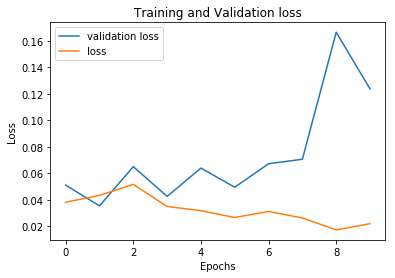

In [135]:
# Visualize output
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(["validation loss","loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation loss")

Text(0.5, 1.0, 'Training and Validation Accuracy')

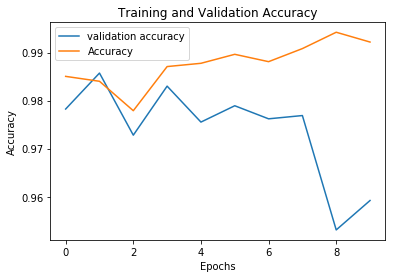

In [136]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(["validation accuracy","Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")